# Fouque vs mine Wesenheit

* * datamapping module loaded!


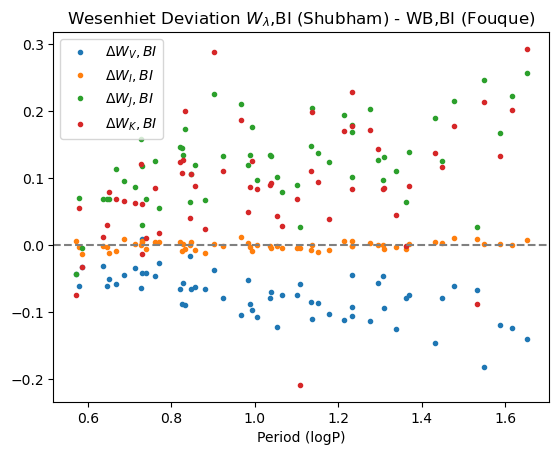

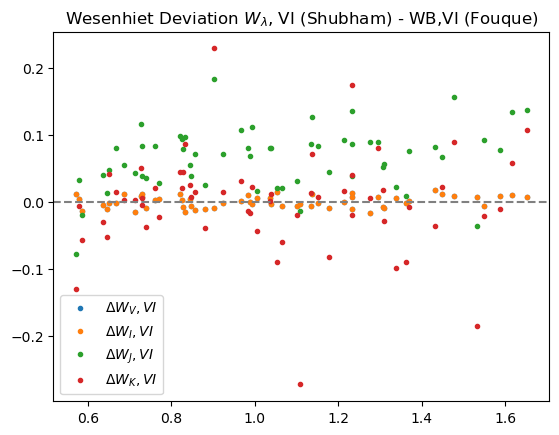

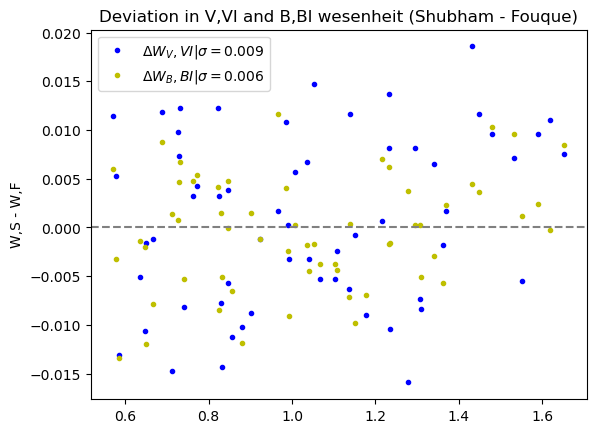

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data.datamapping import mag, colors, R_
data = pd.read_csv('data/59_madore_3.23/1_prepared/59_wes_data.csv')
fou = pd.read_csv('data/input/table7.csv')
for m in mag:
    plt.plot(data['logP'],data[f'{m}BI_h']-fou['Wbi'],'.',label = f'$\Delta W_{m},BI$')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title(f'Wesenhiet Deviation $W_\lambda$,BI (Shubham) - WB,BI (Fouque)')
plt.xlabel('Period (logP)')
plt.legend()
plt.show()

for m in mag:
    plt.plot(data['logP'],data[f'{m}VI_h']-fou['Wvi'], '.',label = f'$\Delta W_{m},VI$')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title(f'Wesenhiet Deviation $W_\lambda$, VI (Shubham) - WB,VI (Fouque)')
#plt.ylim(-0.02,0.02)
plt.legend()
plt.show()

# Deviation between Fouque and Shubham weseheits
dev_bi = data[f'BBI_h']-fou['Wbi']
dev_vi = data[f'VVI_h']-fou['Wvi']
plt.plot(data['logP'],dev_vi, 'b.',label = f'$\Delta W_V,VI | \sigma = {dev_vi.std() :.3f}$')
plt.plot(data['logP'],dev_bi, 'y.', label = f'$\Delta W_B,BI | \sigma = {dev_bi.std() :.3f}$')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.title('Deviation in V,VI and B,BI wesenheit (Shubham - Fouque)')
plt.ylabel(f'W,S - W,F')
plt.show()

# Madore vs Shubham calibrated $\mu - E_{BV}$ deviation

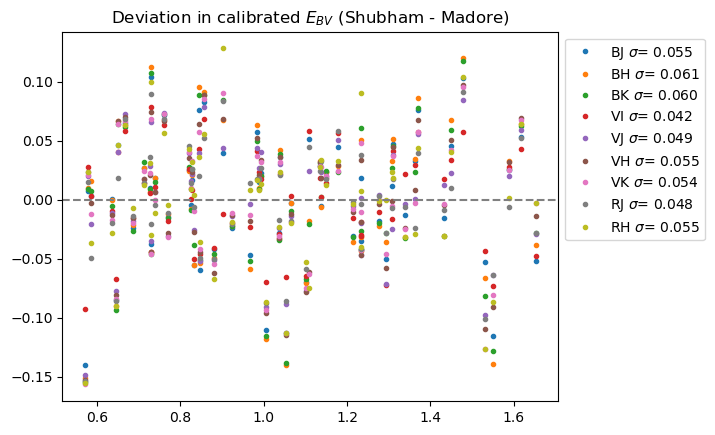

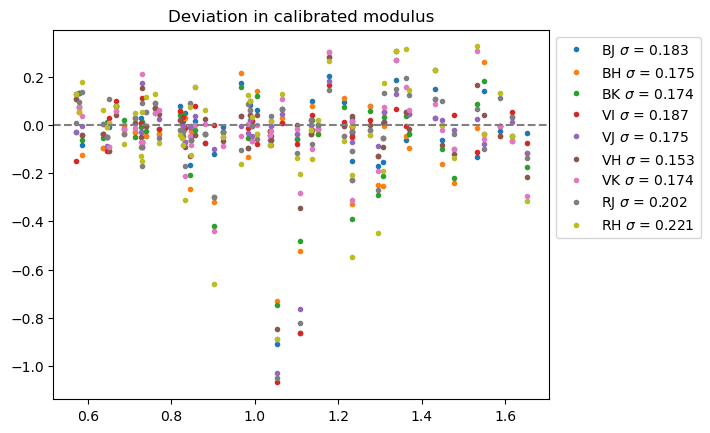

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
madore = pd.read_csv('data/input/59_madore.csv')
madore_corr = pd.read_csv('data/59_madore_3.23/8_result/59_corrected.csv')
wes_show=['BJ', 'BH', 'BK', 'VI', 'VJ', 'VH', 'VK', 'RJ', 'RH' ]
for col in wes_show:
    diff = madore_corr[f'EBVS0{col}_h'] - madore['excessu'] 
    plt.plot(madore['logP'], diff, '.', label = f'{col} $\sigma$= {diff.std() :.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Deviation in calibrated $E_{BV}$ (Shubham - Madore)')
#plt.ylim(-0.2,0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
for col in wes_show:
    diff = madore_corr[f'muS0{col}_h'] - madore['modu'] 
    plt.plot(madore['logP'], diff, '.', label = f'{col} $\sigma$ = {diff.std() :.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Deviation in calibrated modulus')
#plt.ylim(-0.2,0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#    plt.plot(madore['logP'], madore['excessu'] - madore_corr['EBVS0{col}_h'])

# Cruz vs Shubham $\mu - E_{BV}$ correction 

In [3]:
files = {}
files['0'] = '59_madore_3.23'
files['1'] = '95_jesper_3.23'
files['2'] = '20_cluster_cruz_3.23'
files['3'] = '30_LMC_3.41'
files['4'] = '32_SMC_VIJK_2.74'
import pandas as pd
d = ['h', 'g', 'p', 'l', 's']
def load(n):
    cepheids, relation = [], []
    for x in range(n):
        a = pd.read_csv(f'data/{files[str(x)]}/8_result/{files[str(x)][:2]}_merged_data.csv')
        b = pd.read_csv(f'data/{files[str(x)]}/8_result/{files[str(x)][:2]}_5_result_regression.csv')
        cepheids.append(a)
        relation.append(b)
        print(d[x],files[str(x)])
    return cepheids, relation

c,r=load(len(files))

h 59_madore_3.23
g 95_jesper_3.23
p 20_cluster_cruz_3.23
l 30_LMC_3.41
s 32_SMC_VIJK_2.74


In [21]:
name1=[]
name2=[]
for i in range(20):
    for j in range(95):
        if c[2].logP[i] == c[1].logP[j]:
            print(c[1].name[j])
            name1.append(j)
            name2.append(i)

jes = c[1].iloc[name1]
cru = c[2].iloc[name2]

from lvtlaw.a_utils import merge_12
m = merge_12(cru,jes, on=['logP'])

EVSct
QZNor
STTau
CFCas
VLac
CVMon
XLac
VCen
CSVel
USgr
RSOri
GHLup
SNor
YSct
TWNor
XPup
SVVul


ValueError: x and y must have same first dimension, but have shapes (17,) and (30,)

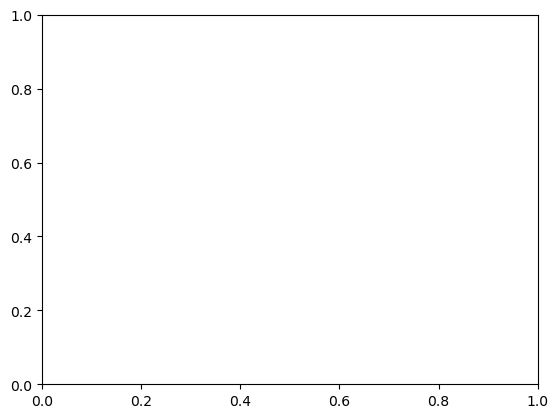

In [22]:
import matplotlib.pyplot as plt
wes_show=['BJ', 'BH', 'BK', 'VJ', 'IH', 'IK']
#    plt.plot(m['logP'], m[f'M_{band}0_p'] - m[f'M_{band}0_g'], 'ko', label = 'cruz - jesper')
#    plt.plot(m['logP'], m[f'EBVS0{col}_p'] - m[f'EBVS0{col}_g'], 'ko', label = 'cruz - jesper')
dv = m[f'EBV'] - jes[f'EBV']
plt.plot(m['logP'], dv, '.', label = f'{col} s = {dv.std():.3f}')
for col in wes_show:
    dv = m[f'EBV'] - m[f'EBVS0{col}_g']
    plt.plot(m['logP'], dv, '.', label = f'{col} s = {dv.std():.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.title(f'EBV Deviation raw cruz - calibrated jesper')
plt.xlabel(f'Period (logP)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
for col in wes_show:
    dv = m[f'mplx'] - m[f'muS0{col}_g']
    plt.plot(m['logP'], dv, '.', label = f'{col} s = {dv.std():.3f}')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.title(f'mu Deviation raw cruz - calibrated jesper')
plt.xlabel(f'Period (logP)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Cruz Jesper Leavitt Law

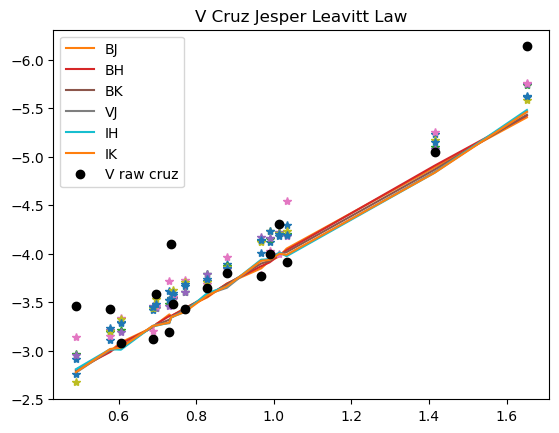

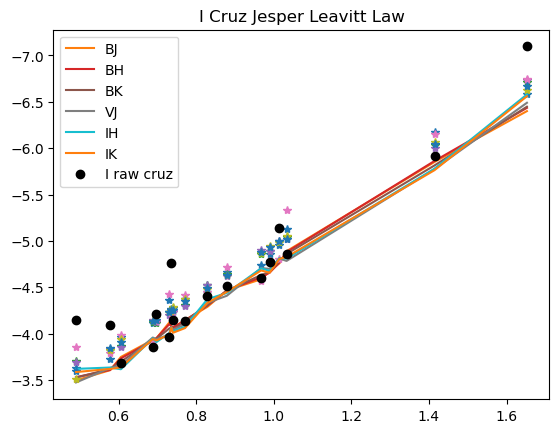

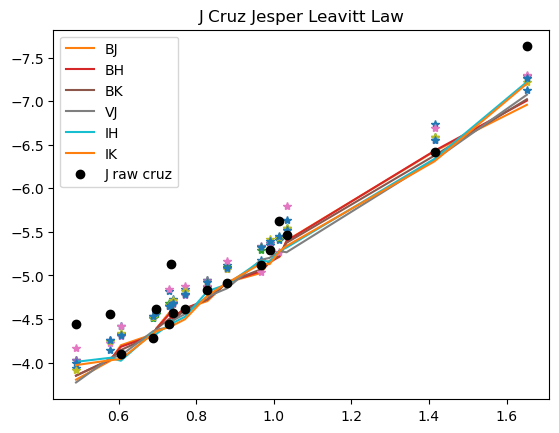

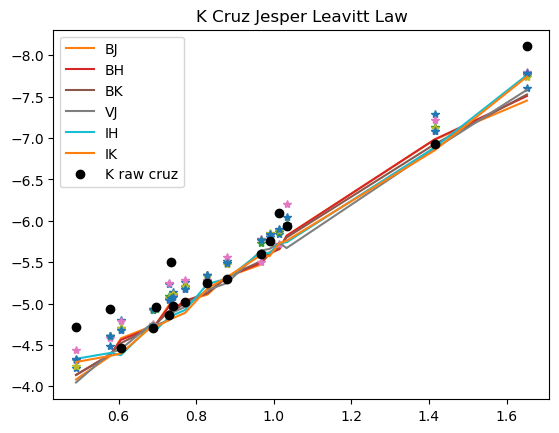

In [92]:
for band in mag:
    for col in wes_show:
        plt.plot(m['logP'], m[f'{band}S0{col}_p'], '*')
        plt.plot(m['logP'], m[f'{band}S0{col}_g'], '-',label = col)
    plt.plot(m['logP'], m[f'M_{band}0_p'], 'ko', label = f'{band} raw cruz') 
    #plt.plot(m['logP'], m[f'M_{band}0_p'] - m[f'M_{band}0_g'], 'ko', label = 'cruz - jesper')
    #plt.axhline(y=0, color='gray', linestyle='--')
    plt.legend()
    plt.title(f'{band} Cruz Jesper Leavitt Law')
    plt.gca().invert_yaxis()
    plt.show()

# Calibrated Leavitt Law

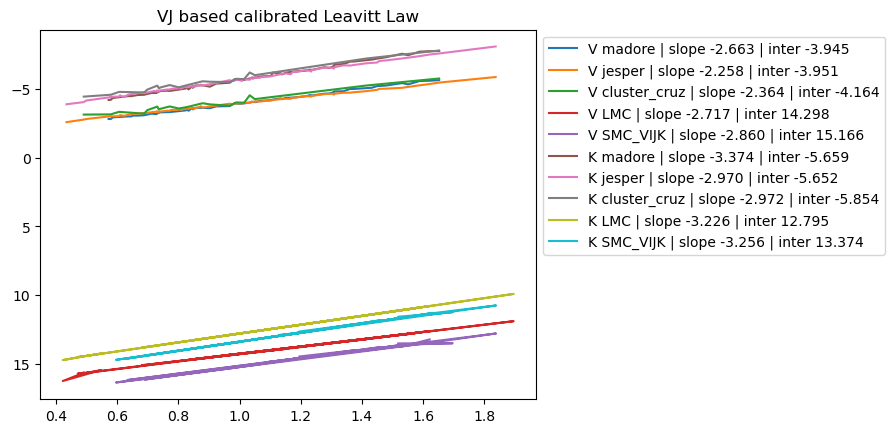

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from data.datamapping import wes_show, mag
col = 'VJ'
for m in ['V', 'K']:
    for n in [0,1,2,3,4]:
        s = r[n][f'{m}0{col}S'].iloc[0]
        i = r[n][f'{m}0{col}S'].iloc[1]
        plt.plot(c[n]['logP'],c[n][f'{m}S0{col}_{d[n]}'], '-', label = f'{m} {files[str(n)][3:-5]} | slope {s:.3f} | inter {i:.3f}')
plt.gca().invert_yaxis()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(f'{col} based calibrated Leavitt Law')
plt.show()

# LMC SMC Distance

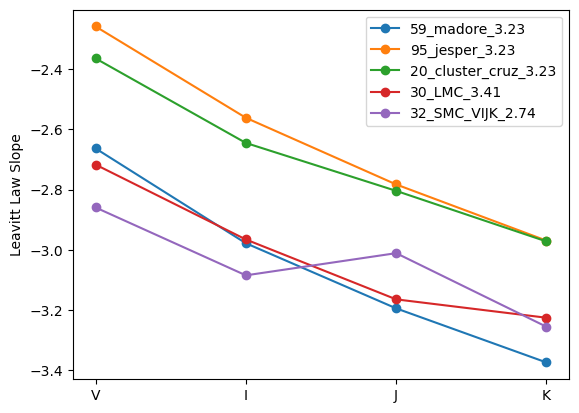

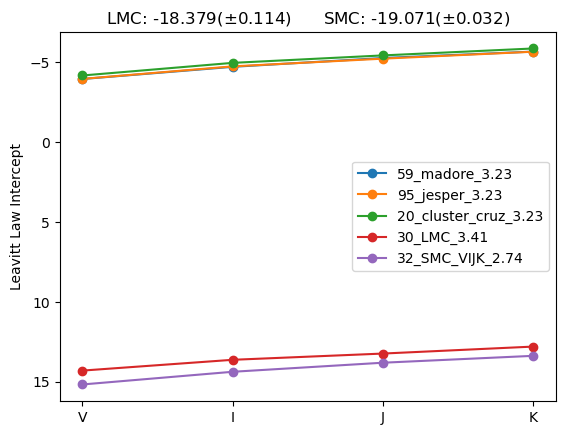

In [157]:
f='S'
t = 0
col='VJ'
lmc = r[t][[f'{m}0{col}{f}' for m in mag]].iloc[1] - r[3][[f'{m}0{col}{f}' for m in mag]].iloc[1]
smc = r[t][[f'{m}0{col}{f}' for m in mag]].iloc[1] - r[4][[f'{m}0{col}{f}' for m in mag]].iloc[1]
for i in range(5):
    sl = r[i][[f'{m}0{col}{f}' for m in mag]].iloc[0]
    plt.plot([x for x in range(len(mag))], sl, '-o', label = files[str(i)])
plt.xticks(ticks=range(len(mag)), labels=mag)  # Set x-axis ticks to values in mag
plt.legend()
#plt.title(f'LMC: {lmc.mean():.3f}($\pm${lmc.std():.3f})      SMC: {smc.mean():.3f}($\pm${smc.std():.3f})')
plt.ylabel(f'Leavitt Law Slope')
plt.show()

for i in range(5):
    int = r[i][[f'{m}0{col}{f}' for m in mag]].iloc[1]
    plt.plot([x for x in range(len(mag))], int, '-o', label = files[str(i)])
plt.legend()
plt.xticks(ticks=range(len(mag)), labels=mag)  # Set x-axis ticks to values in mag
plt.title(f'LMC: {lmc.mean():.3f}($\pm${lmc.std():.3f})      SMC: {smc.mean():.3f}($\pm${smc.std():.3f})')
plt.ylabel(f'Leavitt Law Intercept')
plt.gca().invert_yaxis()
plt.show()


In [20]:
import pandas as pd
from data.datamapping import mag, col_lin

reg = pd.read_csv(f'data/{files[str(1)]}/3_deldel/{files[str(1)][:2]}_del_slope_intercept.csv')

for m in mag:
    bi = reg[f'{m}0{m}BI']
    vi = reg[f'{m}0{m}VI']
    ih = reg[f'{m}0{m}IH']
    jk = reg[f'{m}0{m}JK']
    print(f"\t{m} & {bi.iloc[0] : .3f} ($\pm$ {bi.iloc[2] : .3f}) & {vi.iloc[0] : .3f} ($\pm$ {vi.iloc[2] : .3f}) & {ih.iloc[0] : .3f} ($\pm$ {ih.iloc[2] : .3f}) & {jk.iloc[0] : .3f} ($\pm$ {jk.iloc[2] : .3f}) \\\\")

	B &  0.797 ($\pm$  0.088) &  0.819 ($\pm$  0.075) &  0.791 ($\pm$  0.094) &  0.619 ($\pm$  0.111) \\
	V &  0.818 ($\pm$  0.066) &  0.847 ($\pm$  0.060) &  0.882 ($\pm$  0.079) &  0.778 ($\pm$  0.095) \\
	I &  0.906 ($\pm$  0.041) &  0.907 ($\pm$  0.036) &  1.022 ($\pm$  0.049) &  0.993 ($\pm$  0.060) \\
	J &  0.979 ($\pm$  0.022) &  0.976 ($\pm$  0.019) &  1.013 ($\pm$  0.023) &  1.037 ($\pm$  0.028) \\
	H &  0.986 ($\pm$  0.014) &  0.984 ($\pm$  0.013) &  1.007 ($\pm$  0.015) &  1.023 ($\pm$  0.018) \\
	K &  0.994 ($\pm$  0.009) &  0.992 ($\pm$  0.008) &  1.007 ($\pm$  0.010) &  1.015 ($\pm$  0.012) \\


In [ ]:
for i, m in enumerate(mag):
    print(f"\t{m} &  {reg[m+col].iloc[0] : .3f} ($\pm${reg[m+col].iloc[2] : .3f}) & {reg[m+col].iloc[1] : .3f} ($\pm${reg[m+col].iloc[3] : .3f}) \\\\")

In [59]:
PLWreg = pd.read_csv(f'data/{files[str(1)]}/2_PLW/{files[str(1)][:2]}_5_regression.csv')

col='JK'
for i, m in enumerate(mag):
    print(f"\t{m},{col} &  {reg[m+col].iloc[0] : .3f} ($\pm${reg[m+col].iloc[2] : .3f}) & {reg[m+col].iloc[1] : .3f} ($\pm${reg[m+col].iloc[3] : .3f}) \\\\")

	B,JK &  -3.269 ($\pm$ 0.089) & -6.517 ($\pm$ 0.027) \\
	V,JK &  -3.338 ($\pm$ 0.082) & -6.468 ($\pm$ 0.024) \\
	I,JK &  -3.219 ($\pm$ 0.081) & -6.265 ($\pm$ 0.024) \\
	J,JK &  -3.099 ($\pm$ 0.082) & -5.952 ($\pm$ 0.024) \\
	H,JK &  -3.113 ($\pm$ 0.081) & -6.054 ($\pm$ 0.024) \\
	K,JK &  -3.099 ($\pm$ 0.082) & -5.952 ($\pm$ 0.024) \\


In [43]:
for i, m in enumerate(mag):
    print(f"\t{m} &  {b[1][m+'0'].iloc[0] : .3f} ($\pm${b[1][m+'0'].iloc[2] : .3f}) & {b[1][m+'0'].iloc[1] : .3f} ($\pm${b[1][m+'0'].iloc[3] : .3f}) \\\\")

	B &  -1.855 ($\pm$ 0.110) & -3.221 ($\pm$ 0.033) \\
	V &  -2.259 ($\pm$ 0.098) & -3.951 ($\pm$ 0.029) \\
	I &  -2.563 ($\pm$ 0.093) & -4.735 ($\pm$ 0.028) \\
	J &  -2.784 ($\pm$ 0.088) & -5.218 ($\pm$ 0.026) \\
	H &  -2.917 ($\pm$ 0.084) & -5.598 ($\pm$ 0.025) \\
	K &  -2.971 ($\pm$ 0.084) & -5.653 ($\pm$ 0.025) \\


In [9]:
from data.datamapping import mag, col_lin
ab=0
col='VI'
f='S'
b[0][[f'{m}{ab}{col}{f}' for m in mag]].style

,B0VIS,V0VIS,I0VIS,J0VIS,H0VIS,K0VIS
0,-2.269185,-2.663342,-2.978232,-3.194594,-3.330394,-3.374300
1,-3.214709,-3.944908,-4.706862,-5.258384,-5.558797,-5.659213
2,0.042927,0.028905,0.030740,0.027190,0.022027,0.023236
3,0.012804,0.008621,0.009169,0.008110,0.006570,0.006930


In [15]:
riess = pd.read_csv('data/18_riess/18_true_abs_data.csv')
riess

,Unnamed: 0,name,logP,EBV,plx,M_B0_g,M_V0_g,M_I0_g,M_J0_g,M_H0_g,M_K0_g
0,0,CFCas,0.687994,0.553,12.252555,-2.254463,-2.910745,-3.647558,-4.073122,-4.443855,-4.499111
1,1,CSVel,0.771201,0.737,12.547220,-2.616688,-3.218730,-3.926570,-4.402329,-4.744093,-4.812501
2,2,CVMon,0.730685,0.722,10.978801,-2.437799,-3.005861,-3.780693,-4.255762,-4.609903,-4.680316
3,3,EVSct,0.490098,0.655,11.225259,-2.706761,-3.196909,-3.888575,-4.179029,-4.437192,-4.449022
4,4,GHLup,0.967448,0.347,10.222618,-2.846879,-3.706428,-4.540071,-5.057895,-5.465485,-5.542995
5,5,QZNor,0.578244,0.263,11.425521,-2.782353,-3.406011,-4.077011,-4.537572,-4.846279,-4.907611
6,6,RSOri,0.878917,0.352,11.001908,-3.115326,-3.724868,-4.440180,-4.844901,-5.189698,-5.220207
7,7,SNor,0.989194,0.179,9.728963,-3.111366,-3.878133,-4.653490,-5.168789,-5.558612,-5.635765
8,8,STTau,0.605768,0.368,10.141119,-2.632237,-3.110759,-3.725812,-4.136202,-4.458263,-4.494567
9,9,SVVul,1.652569,0.462,11.815498,-5.070358,-6.094758,-7.052792,-7.583238,-7.995597,-8.063077


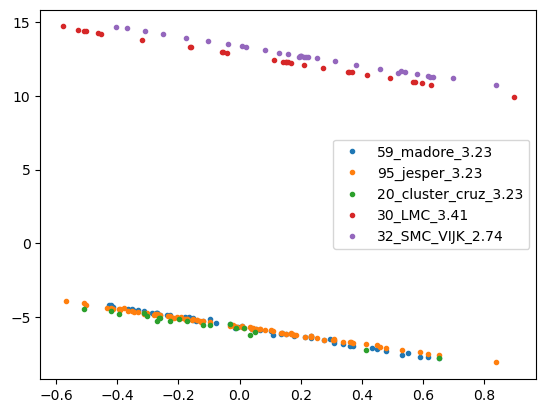

In [115]:
import matplotlib.pyplot as plt
d = ['h', 'g', 'p', 'l', 's']
band = 'K'
for i in range(5):
    plt.plot(c[i]['logP']-1, c[i][f'{band}S0VJ_{d[i]}'], '.', label = f'{files[str(i)]}')
#plt.plot(riess['logP']-1, riess[f'M_{band}0_g'] , 'o', label = f'18_riess')
plt.legend()
plt.show()



In [72]:
lmc = pd.read_csv('data/input/30_LMC.csv')
lmc = lmc.sort_values(by='logP', ascending=True)
lmc = lmc.drop(index = 0).reset_index()
lmc = lmc[['name', 'logP', 'IRSB', 'EBV','V_mag', 'I_mag', 'J_mag', 'K_mag']]
lmc.to_csv('data/input/29_LMC.csv')